In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, )), ])

train = datasets.FashionMNIST('FashionMNIST', train=True, download=True, transform=transform)
training_data = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = datasets.FashionMNIST('FashionMNIST', train=False, download=False, transform=transform)
testing_data = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)


In [0]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)
  
    return x

model = Net()

In [4]:
images, labels = next(iter(testing_data))
ps = torch.exp(model(images.view(-1, 784)))

print(ps.shape)

torch.Size([64, 10])


In [5]:
#top_p -- the top k highest value 
#top_class -- the top k indices
k = 1
top_p, top_class = ps.topk(k, dim=1)
equal = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equal.type(torch.float))
print(f"Accuracy : {100*accuracy.item()} %")

Accuracy : 6.25 %


In [6]:
import torch.optim as optim 

optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()
EPOCHS = 30
training_loss, testing_loss = [], []

for epoch in range(EPOCHS):
  running_loss = 0
  for images, labels in training_data:

    outputs = model(images.view(-1, 784))
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  else:

    test_loss = 0
    accuracy = 0
    with torch.no_grad():
  
      for images, labels in testing_data:

        outputs = model(images.view(-1, 784))
        test_loss += criterion(outputs, labels)

        top_p, top_class = outputs.topk(1, dim=1)
        equal = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equal.type(torch.float))

      training_loss.append(running_loss/len(training_data))
      testing_loss.append(test_loss/len(testing_data))

      print("Epoch: {}/{}..".format(epoch+1, EPOCHS))
      print("Traning loss: {:.3f}".format(running_loss, len(training_data)))
      print("Test loss: {:.3f}".format(test_loss, len(testing_data)))
      print("Test accuracy : {:.3f} %". format(100*accuracy/len(testing_data)))



Epoch: 1/30..
Traning loss: 481.028
Test loss: 70.786
Test accuracy : 84.295 %
Epoch: 2/30..
Traning loss: 367.548
Test loss: 69.841
Test accuracy : 84.445 %
Epoch: 3/30..
Traning loss: 336.524
Test loss: 63.652
Test accuracy : 85.490 %
Epoch: 4/30..
Traning loss: 312.584
Test loss: 63.328
Test accuracy : 85.669 %
Epoch: 5/30..
Traning loss: 295.484
Test loss: 56.419
Test accuracy : 87.221 %
Epoch: 6/30..
Traning loss: 283.793
Test loss: 58.346
Test accuracy : 86.624 %
Epoch: 7/30..
Traning loss: 276.854
Test loss: 60.303
Test accuracy : 85.828 %
Epoch: 8/30..
Traning loss: 260.779
Test loss: 58.132
Test accuracy : 87.739 %
Epoch: 9/30..
Traning loss: 255.553
Test loss: 57.419
Test accuracy : 87.550 %
Epoch: 10/30..
Traning loss: 251.841
Test loss: 55.895
Test accuracy : 87.809 %
Epoch: 11/30..
Traning loss: 242.280
Test loss: 54.477
Test accuracy : 88.227 %
Epoch: 12/30..
Traning loss: 236.306
Test loss: 56.582
Test accuracy : 87.799 %
Epoch: 13/30..
Traning loss: 230.146
Test loss: 5

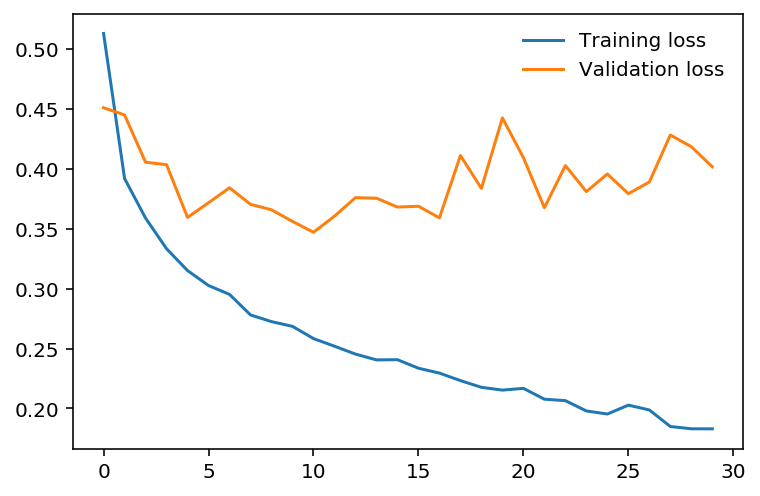

In [7]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt 

plt.plot(training_loss, label="Training loss")
plt.plot(testing_loss, label="Validation loss")

plt.legend(frameon=False)

In [0]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

    self.dropout = nn.Dropout(p=0.2)

  def forward(self, x):
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x), dim=1)
  
    return x

model = Net()

In [9]:
import torch.optim as optim 

optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()
EPOCHS = 30
training_loss, testing_loss = [], []

for epoch in range(EPOCHS):
  running_loss = 0
  for images, labels in training_data:

    outputs = model(images.view(-1, 784))
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  else:

    test_loss = 0
    accuracy = 0
    
    with torch.no_grad():
      model.eval()
      for images, labels in testing_data:
        
        outputs = model(images.view(-1, 784))
        test_loss += criterion(outputs, labels)

        top_p, top_class = outputs.topk(1, dim=1)
        equal = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equal.type(torch.float))

      training_loss.append(running_loss/len(training_data))
      testing_loss.append(test_loss/len(testing_data))

      model.train()

      print("Epoch: {}/{}..".format(epoch+1, EPOCHS))
      print("Traning loss: {:.3f}".format(running_loss, len(training_data)))
      print("Test loss: {:.3f}".format(test_loss, len(testing_data)))
      print("Test accuracy : {:.3f} %". format(100*accuracy/len(testing_data)))



Epoch: 1/30..
Traning loss: 564.886
Test loss: 73.243
Test accuracy : 82.623 %
Epoch: 2/30..
Traning loss: 452.821
Test loss: 70.572
Test accuracy : 83.648 %
Epoch: 3/30..
Traning loss: 420.450
Test loss: 71.051
Test accuracy : 83.539 %
Epoch: 4/30..
Traning loss: 410.119
Test loss: 64.898
Test accuracy : 85.311 %
Epoch: 5/30..
Traning loss: 399.401
Test loss: 63.234
Test accuracy : 85.480 %
Epoch: 6/30..
Traning loss: 387.406
Test loss: 62.140
Test accuracy : 85.828 %
Epoch: 7/30..
Traning loss: 379.245
Test loss: 62.166
Test accuracy : 86.137 %
Epoch: 8/30..
Traning loss: 376.916
Test loss: 60.886
Test accuracy : 86.266 %
Epoch: 9/30..
Traning loss: 372.330
Test loss: 61.134
Test accuracy : 86.166 %
Epoch: 10/30..
Traning loss: 364.606
Test loss: 60.877
Test accuracy : 86.624 %
Epoch: 11/30..
Traning loss: 366.127
Test loss: 60.741
Test accuracy : 85.699 %
Epoch: 12/30..
Traning loss: 357.032
Test loss: 61.180
Test accuracy : 86.744 %
Epoch: 13/30..
Traning loss: 353.567
Test loss: 5

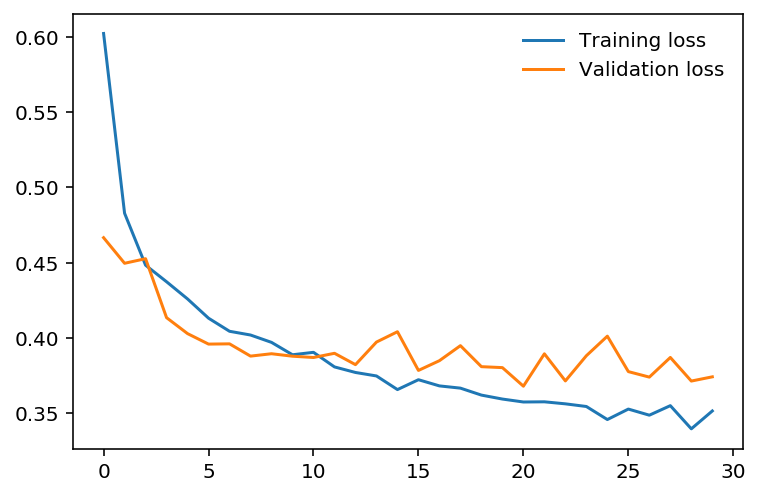

In [10]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt 

plt.plot(training_loss, label="Training loss")
plt.plot(testing_loss, label="Validation loss")

plt.legend(frameon=False)